<a href="https://colab.research.google.com/github/biagi0/biagi0/blob/MSBA/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 1

###Due: 11:59 PM CT, September 13
### Total points: 75






Your homework should be written in a Python notebook and then exported to a PDF. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Gradescope. But be sure to include name and UT EID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook and PDF before submitting. (%matplotlib inline)

# Question 1: AWS SageMaker (10 pts):

Read the article titled ["10 reasons why Amazon SageMaker is great for machine learning"](https://www.softwebsolutions.com/resources/benefits-of-amazon-sagemaker.html) on Amazon SageMaker and answer the following questions:
1. In two paragraphs and in your own words, highlight some key benefits that a platform like Amazon SageMaker offers for the development of a machine learning (ML) application. (5 pts)
2. Use a large language model (LLM) of your choice to generate an alternative response to the above question. Be sure to include the name of the LLM used and the specific (sequence of) prompt(s) you provided. (3 pts)
3. Compare your explanation with the output from the LLM, and summarize your observations regarding the differences between the two answers. (2 pts)

# Answer

# Question 2: Google Flu Trends (10 pts)

The article "The Parable of Google Flu:
Traps in Big Data Analysis" (kept in Canvas --> Modules --> Resources) describes a high-profile (and embarrassingly failed) project done by Google, highlighting the phenomena of data drift and the importance of transparency, among other key issues that an ML project can face.

Read this article and answer the following questions

(i) Briefly describe two important causes of "data drift" in the flu prediction problem that are mentioned in the article (5 pts)

(ii) The last section highlights the importance of transparency. Express in your words, why is transparency important for building data science and AI projects? (You can check this article as a helpful reference: https://hbr.org/2022/06/building-transparency-into-ai-projects or you can look for other sources and cite them in your answer) (5 pts)


#Answer

(i) Some of the causes of Data Drift in the flue prediction from google are "Big Data Hubris" and "Algorithm Dynamics" as mentioned in the article. "Big Data Hubris" is described as the assumption that data or (big data) replaces the need and use of other traditional ways of collecting data like polling among others. Even though there are massive benefits to big data the shere amount of information that you have is not enough to create the most accurate predictions. The second point "Algorithm Dynamics" leads more to the ability to replicate results from the constantly updating big data sources. The challenges faced by big data can include the change in the search algorithm implemented by different departments in google, the use of data not available to the public/internal among other possible reasons why the results are hard to replicate if not impossible.

(ii) I believe that transparancy is extremely important when building any type of projects including AI/Data Science ones because it helps showcase the quality of the work and the ethics used when creating it. As mentioned in the article "Building Transparency Into AI Projects", transparancy can provide multiple benefits including decreasing the risk of error/misuse, distribution of responsibility, internal/external oversight, and expresses respect for people. This topic like many others does not have a right answer and you or anyone trying to create something will have to sit down and decide how much transparancy to give. If you give too much you; your company risk giving away the very value that keeps you making money. If you give too little; you risk the chances of lawsuits and bad credibility if something goes wrong.  

# Question 3: Maximum Likelihood Estimate (10 pts)

Consider the following probability density function (pdf) of a random variable $X$ that takes value $x\in[0,∞)$

$$
f(x;b) = \frac{x}{K b^2}\exp(-\frac{x}{b})
$$

where $b$ is the parameter of the density function, and K is a suitable normalizing constant. The (unscaled) pdfs with $b = 0.1, 0.5, 1$ are plotted below to help you visualize how this family of pdfs looks like.

Suppose we observe 6 values obtained by sampling i.i.d. from the  pdf described above:
$$
\{x_1,x_2,x_3,x_4,x_5,x_6\} =\{0.1, 0.5, 1, 0.4, 2, 1.4\}
$$

Answer the following questions:
1. What is the log-likelihood of observing a set of 6 samples drawn i.i.d from the pdf mentioned above (give an algebraic expression that is valid for any set of 6 samples)? (5 points)
2. What is the maximum likelihood estimate for the parameter $b$? (5 points)

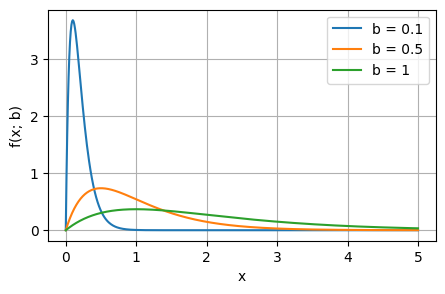

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(x, b):
    return (x / (b**2)) * np.exp(-x / b) # K = 1

b_values = [0.1, 0.5, 1]

x = np.linspace(0, 5, 500)

plt.figure(figsize=(5, 3))
for b in b_values:
    plt.plot(x, pdf(x, b), label=f'b = {b}')

plt.xlabel('x')
plt.ylabel('f(x; b)')
plt.legend()
plt.grid(True)
plt.show()

# Answer

1.


L(b) = logL(b) = 6logK + 12logb + sum(logXi) - b + sum(Xi) # 1-6 Xs

2.


To find the maximum likelihood estimate of b, we need to maximize the log-likelihood function L(b). This is done by differentiating L(b) with respect to b and setting the derivative equal to zero:


dl(b)/db = 12/b - sum(Xi) = 0


Solving for b, we get the MLE:

b = 12/sum(Xi)


For the given data {x_1, x_2, x_3, x_4, x_5, x_6} = {0.1, 0.5, 1, 0.4, 2, 1.4}, we calculate:


sum(Xi) = 0.1 + 0.5 + 1 + 0.4 + 2 + 1.4 = 5.4.


Therefore, the MLE for b is:


b = 12/5.4 ~ 2.222.



# Question 4: Linear Regression (10 pts)

1. What is the difference between R-square and adjusted R square and why is it desirable to use the adjusted value? (4 pts)

2. Overfitting usually happens in complex models. Linear Regression is a fairly simple model. Could overfitting happen in Linear Regression? If so, please explain the scenario in which it could happen and how we can tackle it. (6 pts)



# Answer

# Question 5: Ridge/ Lasso Regression (35 pts)

This is a programming question. Please read through each subpart of this question carefully. You are required to add lines of code as specified in the code cells. Please carefully read through the comments in the code cells to identify what code is to be written, where it is to be written and how many lines of code are required. Code is to be added between the **## START CODE** ## and **## END CODE ##** comments and in place of the keyword **None**. In certain cases, the number of lines of code that are to be written will be specified. For example, **## START CODE ## (1 line of code)** specifies that only 1 line of code is to be added between the ## START CODE ## and ## END CODE ## comments. In case there is no information on the required number of lines, you are allowed to add any number of lines of code.

The following question covers a dataset for house cost and linear models in python. The categorical variables and rows with missing variables are removed to make it easier to run the models.

NOTE
* Only use the following code block if you are using Google Colab. If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
* It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.

In [28]:
from google.colab import files
uploaded = files.upload()

Saving house_cost_data.csv to house_cost_data (1).csv


Imports required

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.mode.chained_assignment = None

df = pd.read_csv('house_cost_data.csv')
X = df.drop(['house_cost'],axis=1)
Y = df['house_cost']

In [31]:
# Show you all the columns in this file
df.columns

Index(['house_cost', 'num_of_beds', 'num_of_baths', 'living_area', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'built_year', 'renovation_year', 'latitude', 'longitude',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
# Show you the first 5 rows in this file
df.head()

,house_cost,num_of_beds,num_of_baths,living_area,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,built_year,renovation_year,latitude,longitude,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Part-1: (2 pts)

Split the data into a training set (75% of data) and a test set (25% of data), using the train_test_split function with random_state = 50.

In [33]:
##  START CODE  ## (1 line of code)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
##  END CODE    ##

Scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the sklearn.preprocessing.scale function for this.

In [34]:
##  START CODE  ## (2 lines of code)
Xscaled_train = preprocessing.scale(X_train)
Xscaled_test = preprocessing.scale(X_test)
##  END CODE    ##

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Print the first 5 rows of the training set after scaling

In [35]:
##  START CODE  ##
Xscaled_train[:5]
##  END CODE    ##

array([[-1.46128799, -1.45010618, -1.36293279, -0.22520747, -0.92013997,
         0.90694939, -1.41249264, -1.16171819, -0.65460814, -0.58245852,
        -0.20780192,  1.34578638, -0.85717047, -0.94773519, -0.24597874],
       [-1.46128799, -1.45010618, -1.37381314,  0.02822559, -0.92013997,
         0.90694939, -2.26332668, -1.1737881 , -0.65460814, -1.63697323,
        -0.20780192, -2.57128162,  1.48741095, -0.1585854 ,  0.05298474],
       [-0.40089416, -1.45010618, -1.08004373, -0.11690425, -0.92013997,
         0.90694939, -1.41249264, -0.8479005 , -0.65460814, -0.71852494,
        -0.20780192,  1.54571781, -0.33300423, -0.11474375, -0.08704936],
       [-1.46128799,  0.49115341, -0.80803501, -0.35221507,  0.93675106,
        -0.63110697,  0.28917544, -1.02894917,  0.24778822,  1.25443807,
        -0.20780192,  0.0386535 , -1.2255035 , -0.75775469, -0.41790328],
       [-0.40089416, -0.47947639, -0.20961583, -0.28068787, -0.92013997,
        -0.63110697, -0.5616586 , -0.60650228, 

Select any two variables. See how their histograms and scatterplots compare before and after scaling.

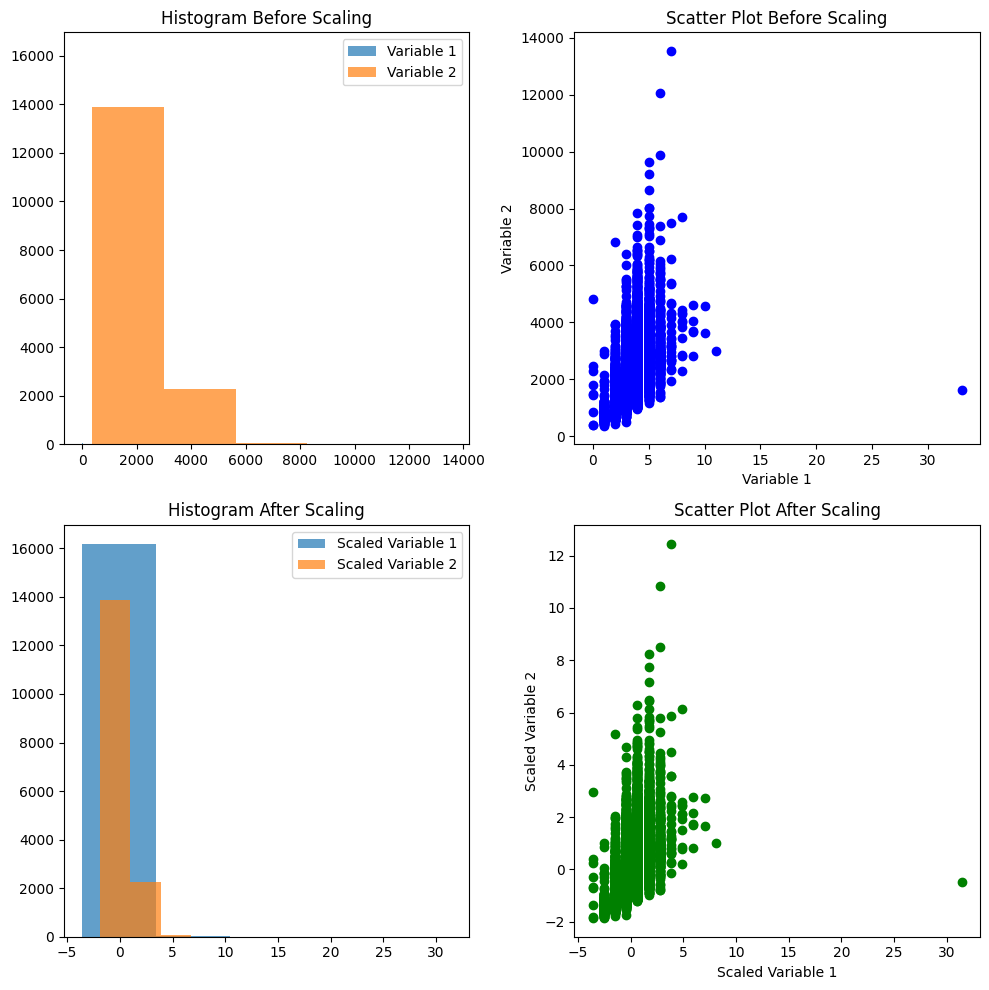

In [43]:
##  START CODE  ##
# Selecting two variables (columns) from X_train for comparison
X_var1 = X_train['num_of_beds']
X_var2 = X_train['living_area']
Xscaled_train = pd.DataFrame(Xscaled_train, columns=X_train.columns)
Xscaled_test = pd.DataFrame(Xscaled_test, columns=X_train.columns)
Xscaled_var1 = Xscaled_train['num_of_beds']
Xscaled_var2 = Xscaled_train['living_area']

# Plot histograms and scatter plots before and after scaling
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram before scaling
axs[0, 0].hist(X_var1, bins=5, alpha=0.7, label='Variable 1')
axs[0, 0].hist(X_var2, bins=5, alpha=0.7, label='Variable 2')
axs[0, 0].set_title('Histogram Before Scaling')
axs[0, 0].legend()

# Scatter plot before scaling
axs[0, 1].scatter(X_var1, X_var2, c='blue')
axs[0, 1].set_title('Scatter Plot Before Scaling')
axs[0, 1].set_xlabel('Variable 1')
axs[0, 1].set_ylabel('Variable 2')

# Histogram after scaling
axs[1, 0].hist(Xscaled_var1, bins=5, alpha=0.7, label='Scaled Variable 1')
axs[1, 0].hist(Xscaled_var2, bins=5, alpha=0.7, label='Scaled Variable 2')
axs[1, 0].set_title('Histogram After Scaling')
axs[1, 0].legend()

# Scatter plot after scaling
axs[1, 1].scatter(Xscaled_var1, Xscaled_var2, c='green')
axs[1, 1].set_title('Scatter Plot After Scaling')
axs[1, 1].set_xlabel('Scaled Variable 1')
axs[1, 1].set_ylabel('Scaled Variable 2')

# Display the plots
plt.tight_layout()
plt.show()
##  END CODE    ##

## Part-2: (5 pts)

Use `sklearn.linear_model.Lasso` and `sklearn.linear_model.Ridge` classes to do a 5-fold cross validation using sklearn's `KFold`. For the sweep of the regularization parameter, we will look at a grid of values ranging from  $\alpha=10^{-6}$  to  $\alpha=10^{6}$.In Python, you can consider this range of values as follows: `alpha = 10**numpy.linspace(-6, 6, 100)` so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models (Lasso and Ridge) with scaled data and report the best chosen $\alpha$ based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using MSE as the scoring metric.

In [37]:
# Define number of folds
##  START CODE  ## (1 line of code)
n_folds = 5
##  END CODE  ##


In [38]:
# Create KFold from sklearn
##  START CODE  ## (1 line of code)
k_fold = KFold(n_splits=n_folds)
##  END CODE    ##


In [39]:
#Define the alphas as defined in the question
##  START CODE  ## (1 line of code)
alphas = 10**np.linspace(-6, 6, 100)
##  END CODE    ##

lasso_avg_mse = {}
ridge_avg_mse = {}

In [45]:
#For each value of alpha and each fold compute the mean square error
#---------NOTE: This might take a while to run, so please be patient---------------#
#---------NOTE: There will be some convergence warning for smaller alphas, but you can ignore it---------------#
from sklearn.linear_model import Lasso
for alpha in alphas:

  #Instantiate a lasso model with the current alpha
  ##  START CODE  ## (1 line of code)
  lasso_model = Lasso(alpha=alpha)
  ##  END CODE    ##

  avg_mse = 0
  for k, (train, test) in enumerate(k_fold.split(Xscaled_train, y_train)):

    #Fit the scaled training data to the lasso model
    ## START CODE ## (1 line of code)
    lasso_model.fit(Xscaled_train.iloc[train], y_train[train])
    ## END CODE ##

    # Predict on the test data
    y_pred = lasso_model.predict(Xscaled_train.iloc[test])

    #Calculate the average mean sqaured error
    ##  START CODE  ## (1 line of code)
    mse = mean_squared_error(y_train[test], y_pred)
    ##  END CODE    ##

    avg_mse += mse

  # Take the average mean squared error as metric
  lasso_avg_mse[alpha] = avg_mse / n_folds

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.277e+13, tolerance: 1.736e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+13, tolerance: 1.771e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e+13, tolerance: 1.668e

In [46]:
# Find the best value for alpha with minimum mean squared error
##  START CODE  ## (1 line of code)
best_alpha_lasso = min(lasso_avg_mse, key=lasso_avg_mse.get)
##  END CODE    ##

print("Best lasso alpha: {}".format(best_alpha_lasso))

Best lasso alpha: 403.70172585965497


In [47]:
#For each value of alpha and each fold compute the mean square error
for alpha in alphas:

  #Instantiate a ridge model with the current alpha
  ##  START CODE  ## (1 line of code)
  ridge_model = linear_model.Ridge(alpha=alpha)
  ##  END CODE    ##

  R_avg_mse = 0

  for k, (train, test) in enumerate(k_fold.split(Xscaled_train, y_train)):

    #Fit the scaled training data to the ridge model
    ## START CODE ## (1 line of code)
    ridge_model.fit(Xscaled_train.iloc[train], y_train[train])
    ## END CODE ##

    # Predict on the test set
    y_pred = ridge_model.predict(Xscaled_train.iloc[test])

    #Calculate the average mean sqaured error
    ##  START CODE  ## (1 line of code)
    mse = mean_squared_error(y_train[test], y_pred)
    ##  END CODE    ##

    R_avg_mse += mse

  # Take the average mean squared error as metric
  ridge_avg_mse[alpha] = R_avg_mse / n_folds

In [48]:
# Find the best value for alpha with minimum mean squared error
##  START CODE  ## (1 line of code)
best_alpha_ridge = min(ridge_avg_mse, key=ridge_avg_mse.get)
##  END CODE    ##

print("Best Ridge alpha: {}".format(best_alpha_ridge))

Best Ridge alpha: 100.0


## Part-3: (7 pts)

Run ridge and lasso regression for all of the $\alpha$ specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors.

In [49]:
# Lasso Regression

alphas = 10**np.linspace(6,-6,100)

lasso = linear_model.Lasso(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the lasso model
  ## START CODE ## (1 line of code)
  lasso.set_params(alpha=a)
  ## END CODE ##

  #Fit the training data to the lasso model
  ## START CODE ## (1 line of code)
  lasso.fit(Xscaled_train, y_train)
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  coefs.append(lasso.coef_)
  ## END CODE ##

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.117e+11, tolerance: 2.156e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.792e+11, tolerance: 2.156e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.295e+13, tolerance: 2.156e

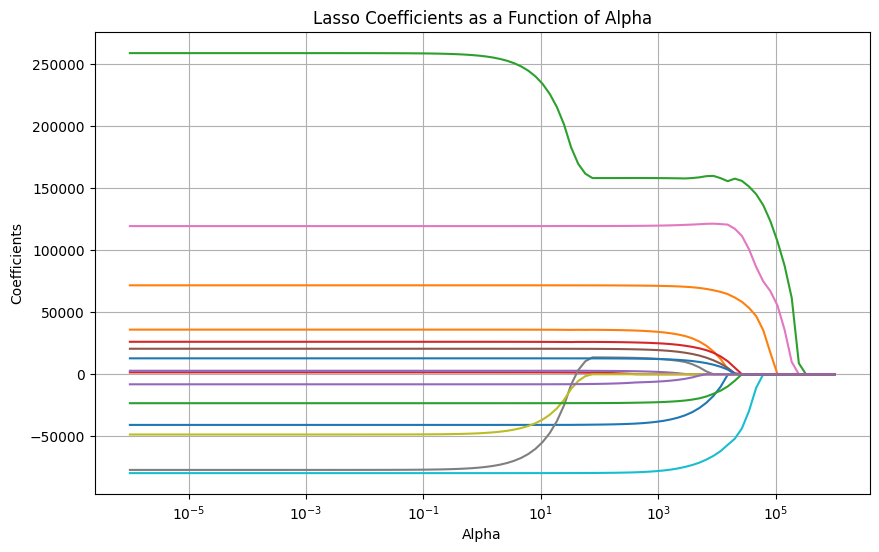

In [50]:
# Write the code to make the plot for coefficients learned from lasso
## START CODE ##
# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))

# Transpose the coefs array to get each coefficient across all alphas
ax = plt.gca()
plt.plot(alphas, coefs)

# Log scale for alpha (because alpha spans multiple orders of magnitude)
ax.set_xscale('log')

# Label the axes
plt.xlabel('Alpha')
plt.ylabel('Coefficients')

# Title for the plot
plt.title('Lasso Coefficients as a Function of Alpha')

# Display grid and make the plot readable
plt.grid(True)
plt.show()
## END CODE ##

In [51]:
# Ridge Regression

alphas = 10**np.linspace(6,-6,100)

ridge = linear_model.Ridge(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the lasso model
  ## START CODE ## (1 line of code)
  ridge.set_params(alpha=a)
  ## END CODE ##

  #Fit the training data to the lasso model
  ## START CODE ## (1 line of code)
  ridge.fit(Xscaled_train, y_train)
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  coefs.append(ridge.coef_)
  ## END CODE ##

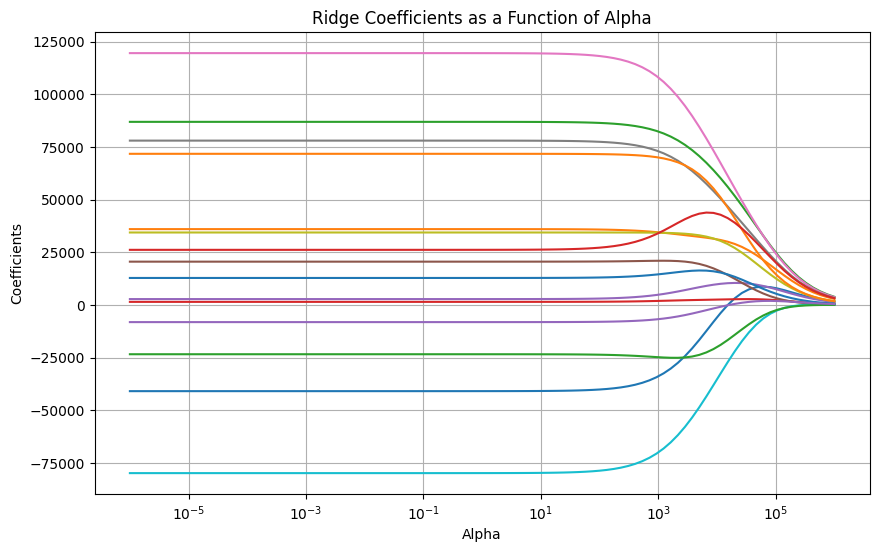

In [52]:
# Write the code to make the plot for coefficients learned from ridge
## START CODE ##
# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))

# Transpose the coefs array to get each coefficient across all alphas
ax = plt.gca()
plt.plot(alphas, coefs)

# Log scale for alpha (because alpha spans multiple orders of magnitude)
ax.set_xscale('log')

# Label the axes
plt.xlabel('Alpha')
plt.ylabel('Coefficients')

# Title for the plot
plt.title('Ridge Coefficients as a Function of Alpha')

# Display grid and make the plot readable
plt.grid(True)
plt.show()
## END CODE ##

What do you qualitatively observe when the value of the regularization parameter changes?

# Answer #

When the value of Alpha changes there are multiple things that take place. The lower the regulization the more the model is allowed to overfit to the original data and become more complex. This will cause a low bias and a high variance making the model sensitive to noise. When the value of Alpha is increased the model becomes less and less complex reducing the overfit qualities but eventually leading to underfitting since the coefficients are penalized. In the Lasso model the higher the alpha will lead to some features going to zero causing feature selection but in Ridge all features would decrease but never to excatly zero.

## Part-4: (5 pts)

Similarly, use `sklearn.linear_model.ElasticNet` to do linear regression with different $\alpha$ values, and plot the coefficients learned for each of them

In [53]:
# Ridge Regression

alphas = 10**np.linspace(6,-6,100)

ElastNet = linear_model.ElasticNet(alpha=alpha)
coefs = []

for a in alphas:
  #Specify current alpha as parameter for the lasso model
  ## START CODE ## (1 line of code)
  ElastNet.set_params(alpha=a)
  ## END CODE ##

  #Fit the training data to the lasso model
  ## START CODE ## (1 line of code)
  ElastNet.fit(Xscaled_train, y_train)
  ## END CODE ##

  #Store learned coefficients in the coef variable
  ## START CODE ## (1 line of code)
  coefs.append(ElastNet.coef_)
  ## END CODE ##

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.948e+11, tolerance: 2.156e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.128e+14, tolerance: 2.156e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.626e+14, tolerance: 2.156e

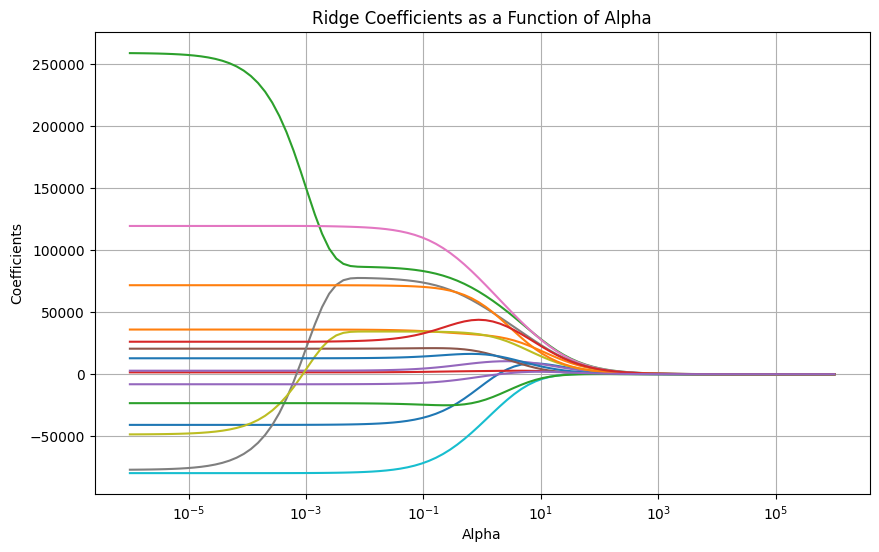

In [54]:
# Write the code to make the plot for coefficients learned from ElasticNet
## START CODE ##
plt.figure(figsize=(10, 6))

# Transpose the coefs array to get each coefficient across all alphas
ax = plt.gca()
plt.plot(alphas, coefs)

# Log scale for alpha (because alpha spans multiple orders of magnitude)
ax.set_xscale('log')

# Label the axes
plt.xlabel('Alpha')
plt.ylabel('Coefficients')

# Title for the plot
plt.title('Ridge Coefficients as a Function of Alpha')

# Display grid and make the plot readable
plt.grid(True)
plt.show()
## END CODE ##

Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models.

# Answer #







## Part-5: (10 pts)

Run the following three regression models with MSE loss on the training data:

(a) linear regression without regularization

(b) linear regression with ridge regularization

(c) linear regression with lasso regularization


For part (b) and (c), use only the best regularization parameters. Report the MSE and R2 on the test data for each of the models.

In [59]:
## START CODE ##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## (a) linear regression without regularization ##
linear_model = LinearRegression()

# Fit the linear regression model to the scaled train data
linear_model.fit(Xscaled_train, y_train)

# Retrieve the coefficients learned by the linear regression model
linear_model_coefs = linear_model.coef_

# Predict on the test set
y_pred_linear = linear_model.predict(Xscaled_train)

# Calculate Mean Squared Error (MSE)
mse_linear_noreg = mean_squared_error(y_train, y_pred_linear)

# Calculate R-Squared
r2_linear_noreg = r2_score(y_train, y_pred_linear)

# Print Linear MSE and R2
print("Linear-No Regulation MSE:", mse_linear_noreg)
print("Linear-No Regulation R-Squared:", r2_linear_noreg)
print()

## (b) linear regression with ridge regularization ##

# Initialize and fit Ridge model with the best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(Xscaled_train, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(Xscaled_test)

# Calculate and report MSE and R^2
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - Best Alpha: ", best_alpha_ridge)
print("Ridge Regression - Mean Squared Error (MSE): ", mse_ridge)
print("Ridge Regression - R-squared (R^2) Score: ", r2_ridge)
print()

## (c) linear regression with lasso regularization ##

# Initialize and fit Ridge model with the best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(Xscaled_train, y_train)

# Predict on the test data
y_pred_lasso = lasso_model.predict(Xscaled_test)

# Calculate and report MSE and R^2
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - Best Alpha: ", best_alpha_lasso)
print("Lasso Regression - Mean Squared Error (MSE): ", mse_lasso)
print("Lasso Regression - R-squared (R^2) Score: ", r2_lasso)

## END CODE ##

Linear-No Regulation MSE: 45106428569.87818
Linear-No Regulation R-Squared: 0.6609290131065224

Ridge Regression - Best Alpha:  100.0
Ridge Regression - Mean Squared Error (MSE):  48830628478.07095
Ridge Regression - R-squared (R^2) Score:  0.6512371946171863

Lasso Regression - Best Alpha:  403.70172585965497
Lasso Regression - Mean Squared Error (MSE):  48861193893.160515
Lasso Regression - R-squared (R^2) Score:  0.6510188873734221


## Part-6: (3 pts)

Train the 3 models and report metrics with the original data without scaling

In [62]:
## START CODE ##

print('Original Data:')
## (a) linear regression without regularization ##
linear_model_orig = LinearRegression()

# Fit the linear regression model to the scaled train data
linear_model_orig.fit(X_train, y_train)

# Retrieve the coefficients learned by the linear regression model
linear_model_orig_coefs = linear_model_orig.coef_

# Predict on the test set
y_pred_linear_orig = linear_model_orig.predict(X_train)

# Calculate Mean Squared Error (MSE)
mse_linear_noreg_orig = mean_squared_error(y_train, y_pred_linear_orig)

# Calculate R-Squared
r2_linear_noreg_orig = r2_score(y_train, y_pred_linear_orig)

# Print Linear MSE and R2
print("Linear-No Regulation MSE:", mse_linear_noreg_orig)
print("Linear-No Regulation R-Squared:", r2_linear_noreg_orig)
print()

## (b) linear regression with ridge regularization ##

# Initialize and fit Ridge model with the best alpha
ridge_model_orig = Ridge(alpha=best_alpha_ridge)
ridge_model_orig.fit(X_train, y_train)

# Predict on the test data
y_pred_ridge_orig = ridge_model_orig.predict(X_test)

# Calculate and report MSE and R^2
mse_ridge_orig = mean_squared_error(y_test, y_pred_ridge_orig)
r2_ridge_orig = r2_score(y_test, y_pred_ridge_orig)

print("Ridge Regression - Best Alpha: ", best_alpha_ridge)
print("Ridge Regression - Mean Squared Error (MSE): ", mse_ridge_orig)
print("Ridge Regression - R-squared (R^2) Score: ", r2_ridge_orig)
print()

## (c) linear regression with lasso regularization ##

# Initialize and fit Ridge model with the best alpha
lasso_model_orig = Lasso(alpha=best_alpha_lasso)
lasso_model_orig.fit(X_train, y_train)

# Predict on the test data
y_pred_lasso_orig = lasso_model_orig.predict(X_test)

# Calculate and report MSE and R^2
mse_lasso_orig = mean_squared_error(y_test, y_pred_lasso_orig)
r2_lasso_orig = r2_score(y_test, y_pred_lasso_orig)

print("Lasso Regression - Best Alpha: ", best_alpha_lasso)
print("Lasso Regression - Mean Squared Error (MSE): ", mse_lasso_orig)
print("Lasso Regression - R-squared (R^2) Score: ", r2_lasso_orig)
## END CODE ##

Original Data:
Linear-No Regulation MSE: 45106428569.87818
Linear-No Regulation R-Squared: 0.6609290131065224

Ridge Regression - Best Alpha:  100.0
Ridge Regression - Mean Squared Error (MSE):  49327132512.5019
Ridge Regression - R-squared (R^2) Score:  0.6476910158083311

Lasso Regression - Best Alpha:  403.70172585965497
Lasso Regression - Mean Squared Error (MSE):  48907964594.53134
Lasso Regression - R-squared (R^2) Score:  0.6506848371773011


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.399e+14, tolerance: 2.156e+11
  model = cd_fast.enet_coordinate_descent(


## Part-7: (3 pts)

Why did we have to scale the data in ridge and lasso regression?



# Answer #